# Predicting Days Before Lapse for Marijuana Drug Abusers

In [318]:
import pandas as pd

# read csv from github url
# return pandas dataframe
url = 'https://raw.githubusercontent.com/prathikr/CS_499_Final_Project/master/BISTRA_GROUP_PROJECT_SMALL.csv'
df = pd.read_csv(url)
df.head(5)

# display frequencies of each state in dataset
df.groupby('State').size()

State
AL     434
AR     198
AZ    2177
CA    3439
CO    1421
CT     663
DC      16
FL    2926
GA      68
HI     226
IA     284
ID     487
IL     498
KS      79
KY     310
LA     139
MA    1086
MD     257
MI     584
MO     877
NC      95
NH     160
NJ     181
NM     105
NV     172
NY     770
OH    1138
OK      31
OR     515
PA     487
RI     215
SC      61
TN     636
TX    4011
VA     378
VT     149
WA     743
WI     369
WV     162
WY       9
dtype: int64

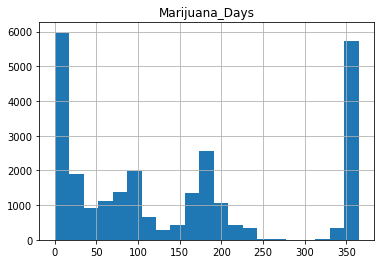

In [319]:
df = df[df.Marijuana_Days != -999] # removes all rows with Marijuana_Days = -999
df.hist(column='Marijuana_Days', bins=21) # 21 chosen so that there would be 3 bins between each x-axis number
df['zipcode'] = df['zipcode'].str[:5] # trim zip codes down to first 5 digits

In [320]:
print("Original df:", df.shape)

unused_potential_predictors = ['SFS8p_0', 'SFS8p_3', 'SFS8p_6', 'SFS8p_12', 'ada_0','ada_3',
'ada_6','ada_12','S2c1_0','S2c1_3','S2c1_6','S2c1_12','S2b1_0','S2b1_3','S2b1_6','S2b1_12','S2z1_3','S2z1_6',
'S2z1_12','S2z2_3','S2z2_6','S2z2_12','S2z3_3','S2z3_6','S2z3_12','S2z4_3','S2z4_6','S2z4_12','S2z5_3','S2z5_6',
'S2z5_12','Any_Cens','Alcohol_Cens','Binge_Cens','Marijuana_Cens','Illicit_Cens','Any_Days','Binge_Days',
'Alcohol_Days','Illicit_Days']

domain_expert_cols_to_drop = ['SPSy_0', 'loc', 'AFSS_0', 'E9a', 'E9b', 'E9c', 'E9d', 'E9e', 'E9e18', 'E9f', 'ID', 
'E9g', 'E9h', 'E9j', 'E9k', 'E9m', 'txtypeg', 'S7e4_0', 'engage42', 'POPIgrp','L5', 'E14a_0', 'E14b_0', 'SDScrY']

text_columns = ['City', 'agyaddr']

cols_to_drop = text_columns + domain_expert_cols_to_drop + unused_potential_predictors

# drop columns and isolate to specific substance
df.drop(columns=cols_to_drop, inplace=True)
df = df[df.primsev == 3] # leaves only marijuana drug abusers in dataframe
df.drop(columns=['primsev'], inplace=True)
print("df Post-extracting predictor column and removing other predictors:", df.shape)

Original df: (26490, 110)
df Post-extracting predictor column and removing other predictors: (14166, 43)


In [321]:
import numpy as np
from IPython.display import display_html

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

# replace all -999 with NaN inplace
df.replace(to_replace = -999, value = np.nan, inplace=True)

# calculate percentage of NaNs in each column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
third = int(round(len(missing_value_df) / 3))
display_side_by_side(missing_value_df[0:third], missing_value_df[third:third*2], missing_value_df[third*2:len(missing_value_df)])

,column_name,percent_missing
female,female,0.000000
nonwhite,nonwhite,0.035296
unemplmt,unemplmt,0.197656
B2a_0,B2a_0,0.000000
State,State,0.000000
zipcode,zipcode,0.000000
noins,noins,59.819286
prsatx,prsatx,0.268248
tottxp4,tottxp4,0.000000
TRI_0,TRI_0,1.221234


In [322]:
print("Original df:", df.shape)

# drop columns with > 25% NaNs
cols = []
for index, row in missing_value_df.iterrows():
    if row['percent_missing'] > 25:
      cols.append(row['column_name'])
df.drop(columns=cols, inplace=True)
print("columns dropped:", cols)
print("new df shape:", df.shape)

Original df: (14166, 43)
columns dropped: ['noins', 'RFQ33c', 'GSSI_0', 'press', 'PSSI_0', 'RERI13p_0', 'FIS4p_0']
new df shape: (14166, 36)


In [323]:
# identify boolean columns
bool_cols = [col for col in df 
             if np.isin(df[col].dropna().unique(), [0, 1]).all()]
print("bool_cols", bool_cols)

bool_cols ['female', 'nonwhite', 'unemplmt', 'prsatx', 'tsd_0', 'und15', 'dldiag', 'suicprbs_0', 'homeless_0', 'S6', 'ncar', 'engage30', 'init']


In [324]:
# replace binary column NaNs with mode
for column in bool_cols:
    df[column].fillna(df[column].mode()[0], inplace=True)
    
# since binary columns are filled we can just replace all other NaNs with mean
for column in df.columns:
    if column != 'State' and column != 'zipcode':
        df[column].fillna(df[column].mean(), inplace=True)
    
# maybe find elegant way to just print % NaNs in entire df and if anything but 0% something went wrong
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
all_null = True
for index, row in missing_value_df.iterrows():
    if row['percent_missing'] > 0:
        all_null = False
        print(row['column_name'], "has null values!!!! rip...")
        
if all_null:
    print("\nno null values!!!! yay!!")


no null values!!!! yay!!


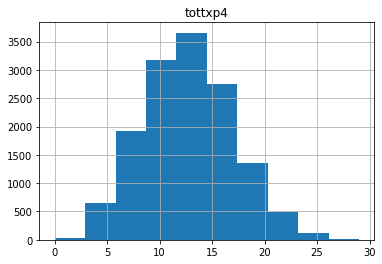

In [325]:
# normalize columns that are continuous
from sklearn import preprocessing

cols = ['tottxp4', 'CWS_0', 'ADHDs_0', 'CDS_0', 'CJSI_0', 'EPS7p_0', 'LRI7_0', 'SRI7_0', 
          'ERS21_0', 'HIVrisk', 'totttld', 'S2x_0', 'SPSm_0']

# visualize data histograms before normalization as a sanity check
df.hist(column=cols[0])

scaler = preprocessing.StandardScaler()
for i in cols:
    df[i] = scaler.fit_transform(df[[i]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a589c1588>]],
      dtype=object)

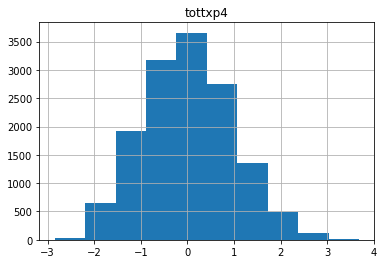

In [326]:
# visualize data histograms after normalization as a sanity check
df.hist(column=cols[0])

In [327]:
# split dataframe so we can predict on california and use all other states to train
state_code = 'CA'
state_name = 'california'
geojson_filename = 'ca_california_zip_codes.geojson'
Xte = df[df.State == state_code]
Xtr = df[df.State != state_code]
Xte.drop(columns=['State'], inplace=True)
Xtr.drop(columns=['State'], inplace=True)
print("non-" + state_name + "-states", Xtr.shape)
print(state_name + "-only", Xte.shape)

non-california-states (12580, 35)
california-only (1586, 35)


//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [328]:
# extract Marujiana_Days predictor
Ytr = Xtr['Marijuana_Days'].copy()
Yte = Xte['Marijuana_Days'].copy()
Xtr.drop(columns=['Marijuana_Days'], inplace=True)
Xte.drop(columns=['Marijuana_Days'], inplace=True)

# extract ZIP for re-labelling later
zips_te = Xte['zipcode'].copy()
Xte.drop(columns=['zipcode'], inplace=True)
Xtr.drop(columns=['zipcode'], inplace=True)

# calculate percentage of NaNs in each column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
third = int(round(len(missing_value_df) / 3))
display_side_by_side(missing_value_df[0:third], missing_value_df[third:third*2], missing_value_df[third*2:len(missing_value_df)])

,column_name,percent_missing
female,female,0.0
nonwhite,nonwhite,0.0
unemplmt,unemplmt,0.0
B2a_0,B2a_0,0.0
State,State,0.0
zipcode,zipcode,0.0
prsatx,prsatx,0.0
tottxp4,tottxp4,0.0
TRI_0,TRI_0,0.0
GVS,GVS,0.0


In [329]:
# train regression model
# examine coefficients and drop columns with coefficient close to 0
# retrain regression model and print results

metric_names = ('r2', 'neg_mean_absolute_error', 
'explained_variance', 'max_error', 'neg_mean_squared_error', 'neg_median_absolute_error')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

lm = LinearRegression()

# use cross validation to train and print out cv statistics
cv_result = cross_validate(lm, Xtr, Ytr, cv=5, scoring=metric_names, return_estimator=True)
metric_results = pd.DataFrame()
for i in metric_names:
    metric_results = pd.concat([metric_results, pd.DataFrame({i : cv_result['test_' + i]})], axis=1)
metric_results

,r2,neg_mean_absolute_error,explained_variance,max_error,neg_mean_squared_error,neg_median_absolute_error
0,0.000096,-101.414555,0.004733,-320.508359,-15138.129580,-89.302338
1,0.026820,-109.111680,0.028672,-331.970805,-16548.804849,-98.225206
2,0.028100,-111.662341,0.050956,-338.148999,-18506.002898,-92.321284
3,0.068365,-102.486747,0.069254,-316.305603,-15150.253873,-90.281058
4,0.047583,-90.542445,0.048160,-301.597033,-12673.450627,-76.696494


In [330]:
model = cv_result['estimator'][4]

In [331]:
coefficients = pd.DataFrame({'Coefficients': model.coef_})
columns = pd.DataFrame({'column_name': Xtr.columns})

combined = pd.DataFrame({'Coefficients': model.coef_, 'column_name': Xtr.columns})
print('FEATURES IN ORDER OF HIGHEST IMPACT ON MODEL...')
combined = combined.reindex(combined.Coefficients.abs().sort_values().index).iloc[::-1]
quarter = int(round(len(combined) / 4))
display_side_by_side(combined[0:quarter], combined[quarter:quarter*2], combined[quarter*2:quarter*3], combined[quarter*3:len(combined)])

FEATURES IN ORDER OF HIGHEST IMPACT ON MODEL...


,Coefficients,column_name
27,-13.175823,HIVrisk
31,-13.077352,SPSm_0
0,11.490044,female
28,11.120524,totttld
9,-11.076097,und15
4,-8.605826,prsatx
17,7.643391,suicprbs_0
24,7.532648,ncar
,Coefficients,column_name
21,-7.341358,ERS21_0


In [332]:
predictions = pd.DataFrame({"Marijuana_Days" : model.predict(Xte)})

y_pred = pd.concat([zips_te, predictions], axis=1).dropna()
y_pred['zipcode'] = y_pred['zipcode'].str[:5]
y_pred = y_pred.groupby('zipcode')['Marijuana_Days'].mean().reset_index()
y_pred.head()

,zipcode,Marijuana_Days
193,94609,104.627103
272,92110,135.891073
299,95116,119.827210
383,95116,149.799536
391,92701,165.390824


In [333]:
import json

with open(geojson_filename, 'r') as jsonFile:
    data = json.load(jsonFile)
tmp = data

In [334]:
geozips = []
for i in range(len(tmp['features'])):
    if tmp['features'][i]['properties']['ZCTA5CE10'] in list(y_pred['zipcode'].unique()):
        geozips.append(tmp['features'][i])

In [335]:
new_json = dict.fromkeys(['type', 'features'])
new_json['type'] = 'FeatureCollection'
new_json['features'] = geozips

In [336]:
open("updated-file.json", "w").write(
    json.dumps(new_json, sort_keys=True, indent=4, separators=(',',': '))
)

1746988

In [337]:
def count_distribution(df, location, subgroup):
    group_counts = pd.DataFrame(df.groupby([location, subgroup]).size().unstack(1))
    group_counts.reset_index(inplace=True)
    return group_counts

In [338]:
def subgroup_distribution(df, location, subgroup):
    group = df.groupby([location, subgroup]).size()
    group_pcts = group.groupby(level=0).apply(lambda a: 100 * x/float(x.sum()))
    group_pcts = pd.DataFrame(group_pcts.unstack(1))
    group_pcts.reset_index(inplace=True)
    return group_pcts

In [339]:
import folium
import os

def create_map(table, zips, mapped_feature, state, add_text=''):
    la_geo = r'updated-file.json'
    m = folium.Map(location=[37.773972, -122.431297], zoom_start=11)
    m.choropleth(
        geo_data = la_geo,
        fill_opacity = 0.8,
        line_opacity = 0.7,
        data = table,
        key_on = 'feature.properties.ZCTA5CE10',
        columns = [zips, mapped_feature],
        fill_color = 'YlGnBu',
        legend_name = (' ').join(mapped_feature.split('_')).title() + ' ' + add_text + ' Across CA'
    )
    folium.LayerControl().add_to(m)
    m.save(outfile=mapped_feature + "_" + state + "_linear_regression_map.html")
    os.remove(la_geo)

In [340]:
create_map(y_pred, 'zipcode', 'Marijuana_Days', 'California')

//anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
